<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQsL_tgCH_BFj94L1Bze9LWJEXL74FLf9V79g&usqp=CAU">

# Data Findings on the Games in Apple App Store

### By Vikneshwarar

## INTRODUCTION

In this project App Store Games dataset was chosen for the data exploration and explanatory purpose. It include every steps that are follwed by the data analys from gathering the data from site to asssesing then cleaning the data to make it tidy for easy exploration and then from the exploratory vizualization were done.

### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Gathering Data

In [2]:
df = pd.read_csv('appstore_games.csv')
df.head(3)

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017


In [3]:
df.shape

(17007, 18)

## Assessing Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17007 entries, 0 to 17006
Data columns (total 18 columns):
URL                             17007 non-null object
ID                              17007 non-null int64
Name                            17007 non-null object
Subtitle                        5261 non-null object
Icon URL                        17007 non-null object
Average User Rating             7561 non-null float64
User Rating Count               7561 non-null float64
Price                           16983 non-null float64
In-app Purchases                7683 non-null object
Description                     17007 non-null object
Developer                       17007 non-null object
Age Rating                      17007 non-null object
Languages                       16947 non-null object
Size                            17006 non-null float64
Primary Genre                   17007 non-null object
Genres                          17007 non-null object
Original Release Date       

## Subtitle and Averge User Ratings and In-app purchases have most null values.

In [5]:
df['Age Rating'].unique()

array(['4+', '9+', '12+', '17+'], dtype=object)

In [7]:
df['Average User Rating'].value_counts()

4.5    2861
4.0    1722
5.0     990
3.5     925
3.0     514
2.5     317
2.0     158
1.5      60
1.0      14
Name: Average User Rating, dtype: int64

In [8]:
df['Primary Genre'].value_counts()

Games                16286
Education              222
Entertainment          198
Utilities               77
Sports                  60
Reference               32
Stickers                29
Finance                 18
Business                16
Productivity            15
Lifestyle               10
Book                     9
Social Networking        9
News                     7
Health & Fitness         5
Food & Drink             4
Navigation               3
Music                    3
Medical                  2
Shopping                 1
Travel                   1
Name: Primary Genre, dtype: int64

# Feature Engineering

## Dimensionality Reduction

### Filtering only the records that belong to Games

In [10]:
df2 = df[df['Primary Genre']=='Games']
df2.shape

(16286, 18)

In [11]:
df2.describe()

,ID,Average User Rating,User Rating Count,Price,Size
count,1.628600e+04,7291.000000,7.291000e+03,16262.000000,1.628500e+04
mean,1.058901e+09,4.065903,3.381256e+03,0.799982,1.174065e+08
std,2.989063e+08,0.744719,4.302767e+04,7.907284,2.058142e+08
min,2.849214e+08,1.000000,5.000000e+00,0.000000,5.132800e+04
25%,9.004810e+08,3.500000,1.300000e+01,0.000000,2.335949e+07
50%,1.110292e+09,4.500000,4.700000e+01,0.000000,5.784474e+07
75%,1.282093e+09,4.500000,3.215000e+02,0.000000,1.354629e+08
max,1.475077e+09,5.000000,3.032734e+06,179.990000,4.005591e+09


### Filtering Games which have atleast 200 reviews

In [12]:
df3 = df[df['User Rating Count'] > 200]
df3.shape

(2238, 18)

## Exploratory Analysis:

In this section we will explore the Dataset of the Games and will try to understand the various factor for the sucess of the Games.

The ratings given by most of the people for the games are between 4 to 4.5

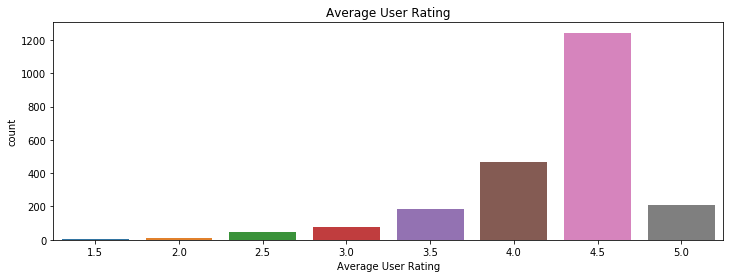

In [13]:
plt.figure(figsize=(12,4))
sns.countplot(x='Average User Rating', data=df3).set_title("Average User Rating");

### The Top 10 Genres of Games, which are performing well.

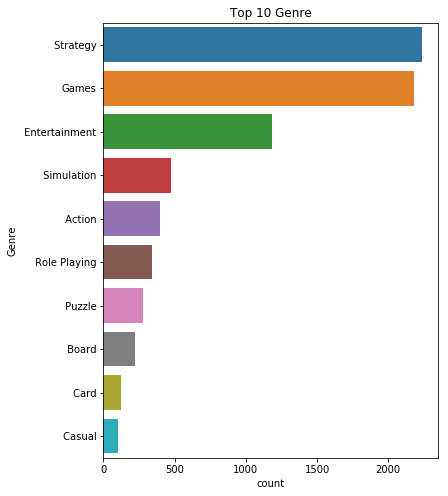

In [15]:
plt.figure(figsize=(6,8))
Genres = pd.DataFrame(df3.Genres.str.split(',',expand=True).values.ravel(), columns=['Genre'])
sns.countplot(y='Genre', data=Genres, order=pd.value_counts(Genres['Genre']).iloc[:10].index).set_title("Top 10 Genre");

# Top rated mobile games

### Filtering Games with high rating by Customers

In [17]:
review = df.sort_values(by='User Rating Count', ascending=False)[['Name', 'Price', 'Average User Rating', 'Size', 'User Rating Count', 'Icon URL']].head(10)
review.iloc[:, 0:-1]

,Name,Price,Average User Rating,Size,User Rating Count
1378,Clash of Clans,0.0,4.5,1.612196e+08,3032734.0
7187,Clash Royale,0.0,4.5,1.451080e+08,1277095.0
13414,PUBG MOBILE,0.0,4.5,2.384082e+09,711409.0
1921,Plants vs. Zombies\u2122 2,0.0,4.5,1.207634e+08,469562.0
8139,Pok\xe9mon GO,0.0,3.5,2.815212e+08,439776.0
2410,Boom Beach,0.0,4.5,2.027858e+08,400787.0
12473,"Cash, Inc. Fame & Fortune Game",0.0,5.0,2.459576e+08,374772.0
8632,Idle Miner Tycoon: Cash Empire,0.0,4.5,4.439747e+08,283035.0
38,TapDefense,0.0,3.5,7.774384e+06,273687.0
3550,Star Wars\u2122: Commander,0.0,4.5,1.230838e+08,259030.0


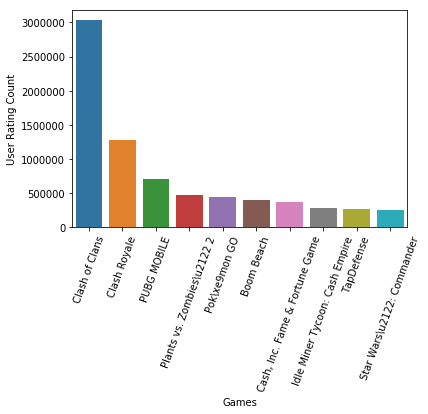

In [28]:
top_games = sns.barplot(x = 'Name', y = 'User Rating Count', data = review)
top_games.set_xticklabels(top_games.get_xticklabels(), rotation=70);
top_games.set(xlabel='Games');

# Paid Vs Free Games 

In [ ]:
A comparision between Paid Vs Free Games

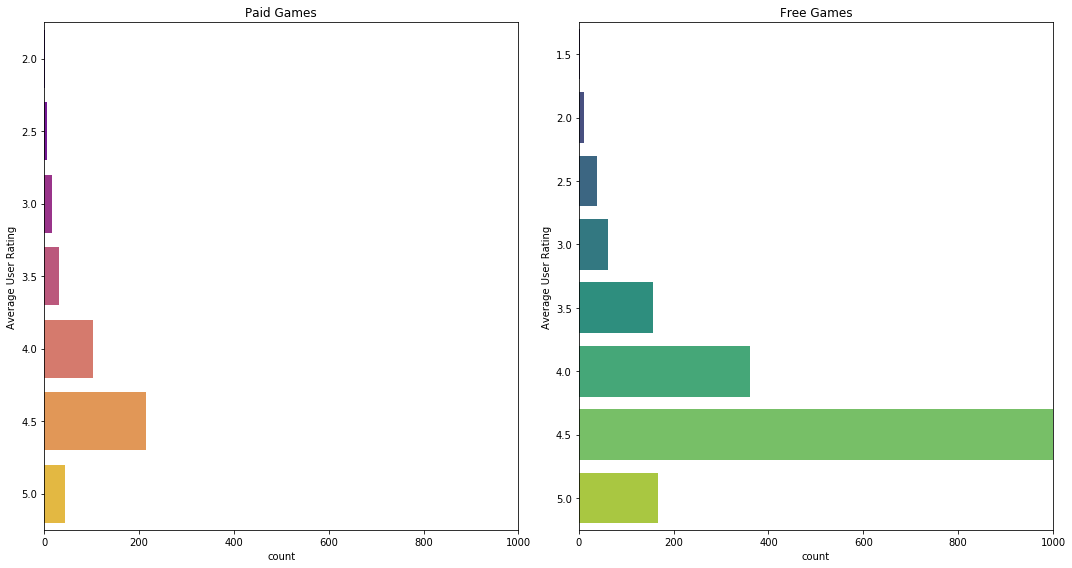

In [16]:
paid = df3[df3['Price']>0]
free = df3[df3['Price']==0]
fig, ax = plt.subplots(1, 2, figsize=(15,8))
sns.countplot(data=paid, y='Average User Rating', ax=ax[0], palette='plasma')
ax[0].set_title('Paid Games')
ax[0].set_xlim([0, 1000])

sns.countplot(data=free, y='Average User Rating', ax=ax[1], palette='viridis')
ax[1].set_title('Free Games')
ax[1].set_xlim([0,1000])
plt.tight_layout();
plt.show()

As expected free games are performing well, when compared to the paid game with respect to the Average User Rating